## Business Understanding

There is an underlying assumption in the financial markets that the summer months are periods of low volatility.  There are other assumptions related to seasonality and volatility.  The purpose of the notebook is to create a framework to investigate and analyze the statistical evidence to support seasonality with respect to volatility in the various financial markets.  In the past, I have largely ignored the date of a data point. In fact, one of my first steps as I prepare my data set for machine learning algorithms was to chop off the date of the data point. But maybe that is a huge mistake.  

1.  Are the summer months distinctly less volatile than other months of the year?
2.  Is there any clear evidence of seasonality with respect to volatility?
3.  Should the dates or months be included in my machine learning algorithms?

In [1]:
#import various libraries 

import pandas as pd
import numpy as np

In [2]:
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
#read csv file into og (original gangster)
og = pd.read_csv(r"C:\Users\Matt\Desktop\SP.csv")

In [5]:
#look at the volume of days in set
len(og)

7559

In [6]:
#look at the dataframe
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/1989,277.720001,277.720001,273.809998,275.309998,275.309998,128500000
1,1/4/1989,275.309998,279.750000,275.309998,279.429993,279.429993,149700000
2,1/5/1989,279.429993,281.510010,279.429993,280.010010,280.010010,174040000
3,1/6/1989,280.010010,282.059998,280.010010,280.670013,280.670013,161330000
4,1/9/1989,280.670013,281.890015,280.320007,280.980011,280.980011,163180000


# Data Preperation 

Since we want to evaluate by month, it would be best to create distinct columns for each part of the date, putting the month, day and year into its own column.  

In [7]:
#convert the year, month and day into their own columns for groupings
og.Date = pd.to_datetime(og.Date)
og['year'] = og.Date.dt.year
og['month'] = og.Date.dt.month
og['day'] = og.Date.dt.day



In [8]:
#check the new columns
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,1,3
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,1,4
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,1,5
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,1,6
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,1,9


In order to evaluate the volatility, we need to create a new column that shows the change in percentage terms of the change in prices

In [9]:
#Create column that shows the absolute daily percentage change
og['change'] = (((og.Close - og.Close.shift(1))/og['Close']).abs())

In [10]:
#test that change went through
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,1,3,NaN
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,1,4,0.014744
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,1,5,0.002071
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,1,6,0.002352
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,1,9,0.001103


My brain is asking to see the month names when analyzing, convert the month number to the name

In [11]:


og['month'] = og['month'].map({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                              7: 'July', 8: 'Aug', 9: 'Sep', 
                               10: 'Oct', 11: 'Nov', 12: 'Dec',})

In [12]:
#test that change went through
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
0,1989-01-03,277.720001,277.720001,273.809998,275.309998,275.309998,128500000,1989,Jan,3,NaN
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,Jan,4,0.014744
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,Jan,5,0.002071
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,Jan,6,0.002352
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,Jan,9,0.001103


In [13]:
#check the null values in the dataframe
og.isnull().sum(axis=0)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
change       1
dtype: int64

Remove the one NAN value in the change column which is due to no previous close data as its the first row of the set

In [14]:
og = og.dropna(how='any',axis=0) 

In [15]:
#checked the changes were drop
og.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
1,1989-01-04,275.309998,279.750000,275.309998,279.429993,279.429993,149700000,1989,Jan,4,0.014744
2,1989-01-05,279.429993,281.510010,279.429993,280.010010,280.010010,174040000,1989,Jan,5,0.002071
3,1989-01-06,280.010010,282.059998,280.010010,280.670013,280.670013,161330000,1989,Jan,6,0.002352
4,1989-01-09,280.670013,281.890015,280.320007,280.980011,280.980011,163180000,1989,Jan,9,0.001103
5,1989-01-10,280.980011,281.579987,279.440002,280.380005,280.380005,140420000,1989,Jan,10,0.002140


# Data understanding

In [16]:
#look at basic statistics on the change column
og.change.describe()

count    7558.000000
mean        0.007401
std         0.008159
min         0.000000
25%         0.002141
50%         0.005002
75%         0.009911
max         0.103782
Name: change, dtype: float64

In [17]:
#groupby monthly change and sort order by mean of change
change_mean = og.groupby(['month']).change.mean()
change_mean = change_mean.sort_values(ascending = False)
change_mean

month
Oct      0.009036
Sep      0.007748
Nov      0.007694
Jan      0.007484
March    0.007451
Aug      0.007367
Feb      0.007293
April    0.007237
July     0.006991
Dec      0.006907
May      0.006835
June     0.006708
Name: change, dtype: float64

In [18]:
#groupby monthly change and sort order by std of change
change_std = og.groupby(['month']).change.std()
change_std = change_std.sort_values(ascending = False)
change_std

month
Oct      0.011572
Sep      0.009291
Nov      0.009260
Aug      0.008719
March    0.008109
Dec      0.007816
Jan      0.007461
Feb      0.007088
April    0.007061
July     0.006849
May      0.006379
June     0.006285
Name: change, dtype: float64

In [19]:
change_mean.describe()

count    12.000000
mean      0.007396
std       0.000614
min       0.006708
25%       0.006970
50%       0.007330
75%       0.007537
max       0.009036
Name: change, dtype: float64

Looking at averages, the fall months seem to be the most volatile with October, September and November being at the top. In addition, June is at the bottom, July is in the bottom quartile and August is in the middle. The differences are significant from a volatility perspective with a 23 basis point disparity between October and June which would translate into roughly a 3.75% annualized volatility difference. That being said, to examine the statistical difference, it would be best to look at their standard deviations:

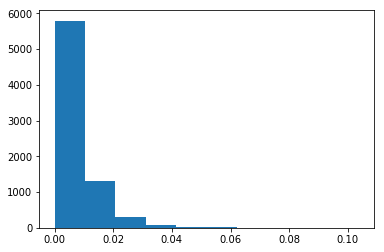

In [20]:
#maybe some outliers are skewing these means
#look at a histogram of the change column
plt.hist(og.change);

In [21]:
def custom_df(df, deviations, start_year, end_year):
    """
    Description: create function to remove some of the major outliers in the dataset and sort by year
    
    Arguments:
    df: dataframe
    deviations: how many deviations from the mean to remove rows where the change column is greater 
    start_year: the year to start including rows within the dataframe
    end_year: the year to stop including rows within the dataframe 
    
    
    Returns:
    The new dataframe
    
    """
    
    std = df.change.std()
    meany = df.change.mean()
    away = (std * deviations) + meany
    df = df[(df['change'] < away)]
    df = df[(df['year'] >= start_year)]
    df = df[(df['year'] <= end_year)]
    return df
    

In [22]:
#create new dataframe with function
new_df = custom_df(og, 5, 2015, 2020)

In [23]:
#look at how many days are in our new dataframe
len(new_df)

1006

In [24]:
#look at tail to ensure function is including right days
new_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
7554,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,2018,Dec,24,0.027868
7555,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,2018,Dec,26,0.047250
7556,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,2018,Dec,27,0.008490
7557,2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,2018,Dec,28,0.001243
7558,2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000,2018,Dec,31,0.008421


In [25]:
#look at head to ensure function is including the correct starting days
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,change
6553,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,2015,Jan,2,0.000340
6554,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,2015,Jan,5,0.018618
6555,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,2015,Jan,6,0.008973
6556,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,2015,Jan,7,0.011496
6557,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,2015,Jan,8,0.017574


In [26]:
#groupby month for the means of the change column and sort by the values with least volatile months first
customized = new_df.groupby(['month']).change.mean().sort_values(ascending = True)
customized

month
July     0.004180
May      0.004662
June     0.005082
Aug      0.005319
April    0.005397
Nov      0.005591
Oct      0.005765
Sep      0.005803
March    0.006258
Feb      0.007382
Jan      0.007503
Dec      0.007601
Name: change, dtype: float64

In [27]:
#send groupby to a list
new_list = customized.index.tolist()

In [28]:
#show list
new_list

['July',
 'May',
 'June',
 'Aug',
 'April',
 'Nov',
 'Oct',
 'Sep',
 'March',
 'Feb',
 'Jan',
 'Dec']

In [29]:
#find the index of month in list
new_list.index('July') + 1 

1

# Data Modeling 

In order to properly analyze the impact of the season or month on a market's volatility, create a function that transforms the dataframe into a rank with respect to a months volatility within a given year.  

In [30]:
def rank_month(frame, start_year, end_year):
    """
    Description: A function which ranks each month within a given year by its volatility.  The month with 
    the highest average daily change within the year gets ranked 12 and the month with the 
    lowest average daily change within the year gets ranked 12
    
    Arguments:
    frame: the dataframe 
    start_year: the year to start including rows within the dataframe
    end_year: the year to stop including rows within the dataframe 
    
    Returns:
    Dataframe
    
    """
    
    the_year = start_year
    Jan = []
    Feb = []
    March = []
    April = []
    May = []
    June = []
    July = []
    Aug = []
    Sep = []
    Oct = []
    Nov = []
    Dec = []
    Period = []
    
    while the_year < end_year:
        df = frame[(frame['year'] == the_year)]
        months_grouped = df.groupby(['month']).change.mean().sort_values(ascending = True)
        new_list = months_grouped.index.tolist()
        Jan.append(new_list.index('Jan') + 1) 
        Feb.append(new_list.index('Feb') + 1)
        March.append(new_list.index('March') + 1)
        April.append(new_list.index('April') + 1)
        May.append(new_list.index('May') + 1)
        June.append(new_list.index('June') + 1)
        July.append(new_list.index('July') + 1)
        Aug.append(new_list.index('Aug') + 1)
        Sep.append(new_list.index('Sep') + 1)
        Oct.append(new_list.index('Oct') + 1)
        Nov.append(new_list.index('Nov') + 1)
        Dec.append(new_list.index('Dec') + 1)
        
        Period.append(the_year)
        
        the_year = the_year + 1  
    
    rank = [('Year', Period),
            ('Jan', Jan),
            ('Feb', Feb),
            ('March', March),
            ('April', April),
            ('May', May),
            ('June', June),
            ('July',July),
            ('Aug', Aug),
            ('Sep', Sep),
            ('Oct', Oct),
            ('Nov', Nov),
            ('Dec', Dec),
           ]
    df = pd.DataFrame.from_items(rank)
    
        
    return df

In [31]:
#create a new dataframe with function rank_month

new_found_df = rank_month(og, 1990, 2018)

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


In [32]:
#look at head of dataframe
new_found_df.head()

,Year,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1990,10,5,4,3,2,6,7,12,8,11,9,1
1,1991,11,12,4,10,8,6,2,5,1,3,7,9
2,1992,6,11,3,12,9,5,7,1,8,10,4,2
3,1993,4,12,11,10,9,6,8,2,5,1,7,3
4,1994,2,10,5,12,6,8,1,3,7,11,9,4


In [33]:
#look at the statistical characteristics of dataframe
details = new_found_df.describe()
details

,Year,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2003.500000,6.892857,7.000000,6.642857,7.214286,6.714286,5.892857,6.321429,6.071429,6.464286,7.321429,6.071429,5.392857
std,8.225975,3.603900,3.399346,3.245673,3.900210,2.733295,3.325984,3.255236,4.045378,2.987407,3.878273,3.102312,3.890533
min,1990.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1996.750000,2.750000,4.000000,4.000000,3.750000,4.000000,3.000000,4.000000,2.750000,5.000000,3.750000,3.750000,1.750000
50%,2003.500000,8.000000,8.000000,6.500000,9.000000,7.000000,6.000000,6.500000,5.000000,6.000000,7.000000,5.500000,4.000000
75%,2010.250000,9.250000,10.000000,8.250000,10.250000,8.250000,8.000000,8.250000,10.250000,8.250000,11.000000,9.000000,9.000000
max,2017.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


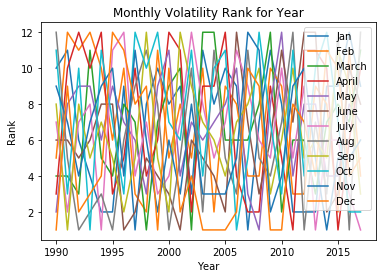

In [34]:
#plot the volatility as a line graph by period

new_found_df.plot(x="Year", y=["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.ylabel('Rank')
plt.title('Monthly Volatility Rank for Year')
plt.show()


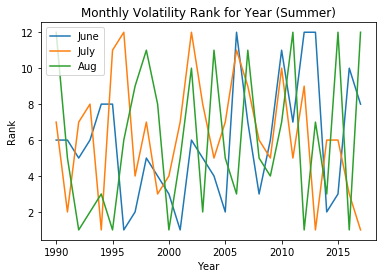

In [35]:
#plot just a few months in attempt to make more sense of data 

new_found_df.plot(x="Year", y=["June", "July", "Aug"])
plt.ylabel('Rank')
plt.title('Monthly Volatility Rank for Year (Summer)')
plt.show()

In [36]:
#create dataframe to chart the averages by month 
barchart_df = new_found_df.drop(columns=['Year'])

barchart_df = barchart_df.mean(axis=0)

barchart_df

Jan      6.892857
Feb      7.000000
March    6.642857
April    7.214286
May      6.714286
June     5.892857
July     6.321429
Aug      6.071429
Sep      6.464286
Oct      7.321429
Nov      6.071429
Dec      5.392857
dtype: float64

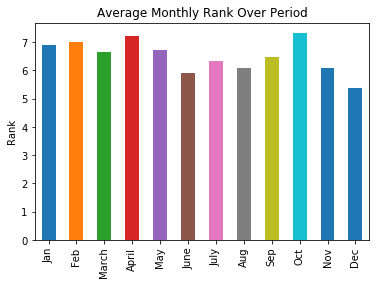

In [37]:
#chart the nmonthly averages

barchart_df.plot(kind='bar') 

plt.ylabel('Rank')
plt.title('Average Monthly Rank Over Period')


plt.show()

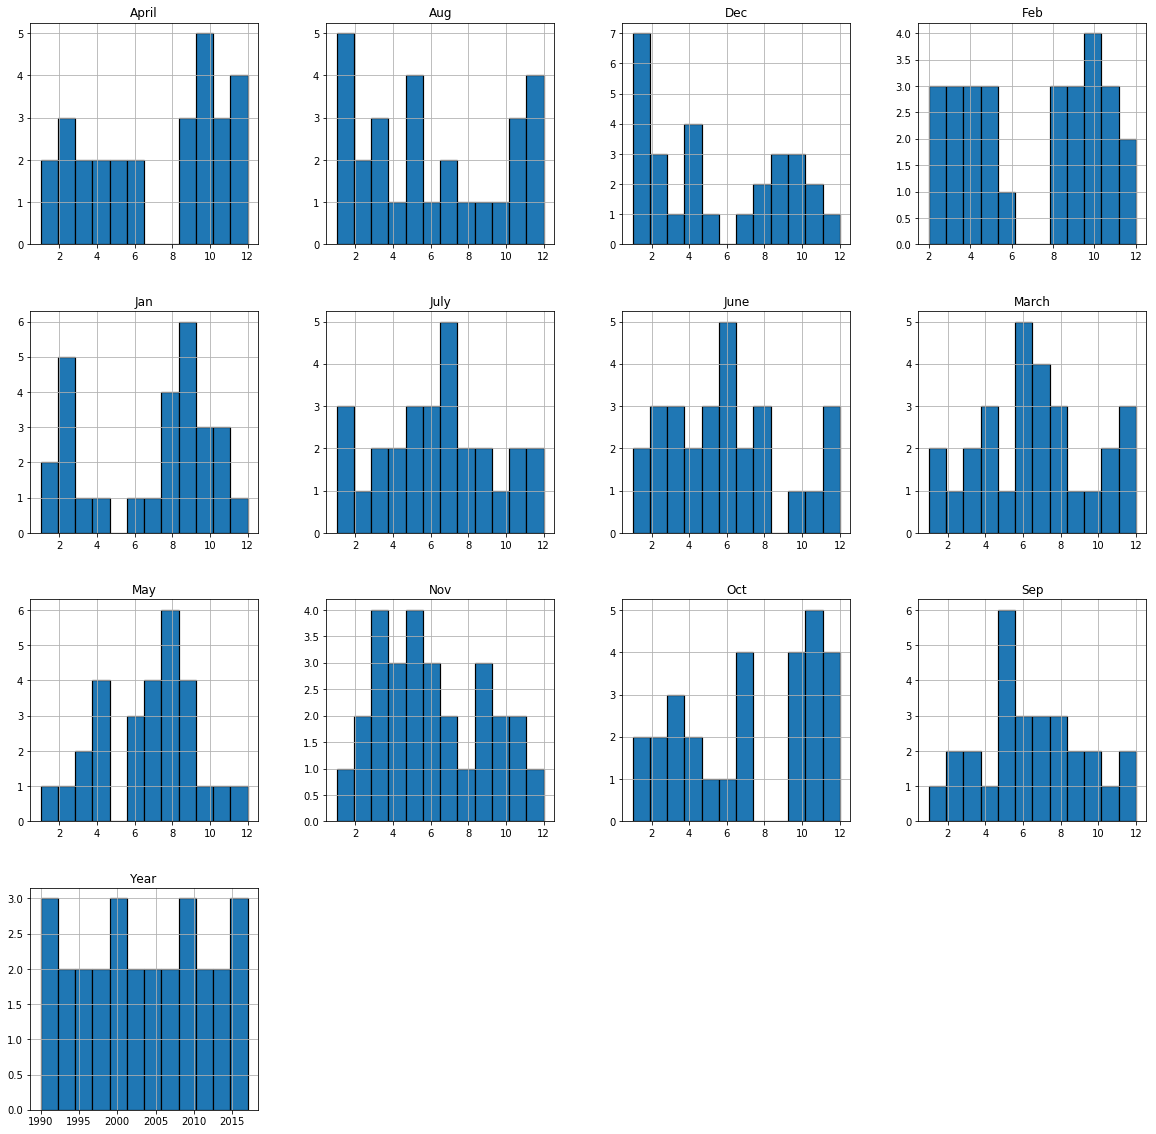

In [38]:
#plot histograms of the dataframe by month

new_found_df.hist(bins = 12, edgecolor='black', linewidth=1.2, figsize=(20,20) );

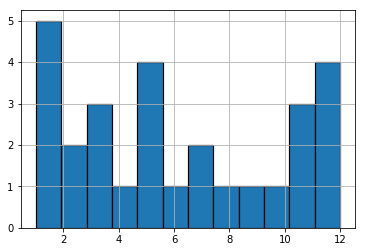

In [39]:
#plot individual month for better view 
new_found_df.Aug.hist(bins=12, edgecolor='black', linewidth=1.2);

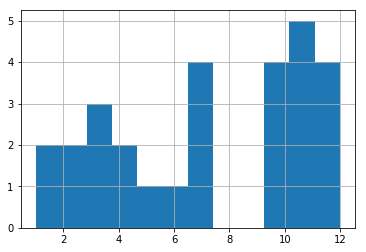

In [40]:
#plot individual month for better view 
new_found_df.Oct.hist(bins=12);

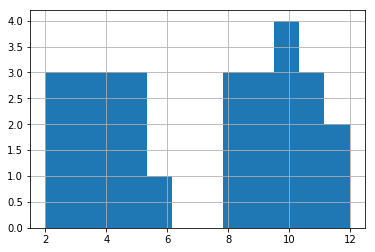

In [41]:
#plot individual month for better view 
new_found_df.Feb.hist(bins=12);

# Evaluate the results

1.  Are the summer months distinctly less volatile than other months of the year?
2.  Is there any clear evidence of seasonality with respect to volatility?
3.  Should the dates or months be included in my machine learning algorithms?



Looking at these distributions, it's hard to get a sense of a particular seasonality with respect to the volatility. August had as many 12s as October. August also seemed to have its data the most spread out, reasoning that it tends to be either very quiet or very volatile. April surprised me with how far stacked to the right its distribution was as not too many people mention April as a particularly volatile month. December seems to be the clear winner if we were betting which month would be the quietest in a given year .

Even though it is difficult to judge equity volatility based solely on the month, it does seem that this variable could be a valuable input for a clustering or decision tree machine learning algorithm. The wide dispersion within some of the distributions actually makes me think it could be very helpful in improving a models accuracy. Also, using a machine learning algorithm, we could measure the impact of the month on the model.

Knowing the month alone does not provide enough information to determine the likelihood of a volatile period but pairing it with other factors would likely help a machine learning algorithm improve its accuracy.